In [1]:
# Include Libraries
# make necessary imports

import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle

In [2]:
# Importing dataset using pandas dataframe
# read the data
# reading data files 

df = pd.read_csv("train.csv")

In [3]:
# data observation
# Get shape and head

# Inspect shape of 'df' 
df.shape

(20800, 5)

In [4]:
df.shape

(20800, 5)

In [5]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


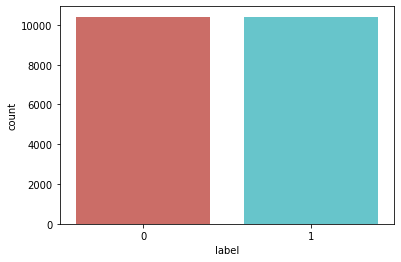

In [6]:
# distribution of classes for prediction

def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [7]:
# data integrity check (missing label values)
# the dataset does not contains missing values therefore no cleaning required

def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
check finished.


In [8]:
# Separate the labels and set up training and test datasets

# Get the labels
y = df.label
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
# Drop the 'label' column
df.drop("label",axis=1)


,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...


In [10]:

df.drop("author", axis=1)

,id,title,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",A week before Michael T. Flynn resigned as nat...,0


In [11]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
x=df.drop('label',axis=1)
y=df.label
y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [13]:
# Make training and test sets

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [14]:
X_train.head(10)

1748     Share on Facebook \nWhen you imagine partisan ...
1795     PARIS (AP)  —   A voting station in eastern Fr...
7870     JERUSALEM  —   Israel’s   debate over Jewish s...
11693    Share on Twitter The Wildfire is an opinion pl...
11048    Share This \nVice Admiral Kevin Donegan today ...
8235     In the world according to President Trump, the...
10534    Then you beat me by a quarter because all I go...
13227    Posted on October 28, 2016 by Michael Snyder \...
12046    Font Size "What does the rising gold price mea...
13251    WASHINGTON  —   Hillary Clinton expressed doub...
Name: text, dtype: object

In [15]:
X_test.head(10)

17724    Did you hear the speech that Al Gore gave in T...
18553    (Want to get this briefing by email? Here’s th...
1185     ( ANTIMEDIA ) If you had happened to Google th...
11660    Hillary Clinton Seeks Even More Unfit Secretar...
4639     LOS ANGELES  —   “We got one!” Those words, sh...
223      If I were one of those Guardsmen and the Spets...
11697    Authorities in two German states have expresse...
19529    \nPosted by Matthew Bernstein | Nov 17, 2016 |...
4676     Authorities continue to investigate how 29 sus...
18829    Julian Assange October Surprise REVEALED 10/28...
Name: text, dtype: object

In [16]:
# before we can train an algorithm to classify fake news labels, we need to extract features from it. It means reducing the mass
# of unstructured data into some uniform set of attributes that an algorithm can understand. For fake news detection, it could 
# be word counts (bag of words). 

# we will start with simple bag of words technique 
# Building the Count and Tfidf Vectors

# creating feature vector - document term matrix
# Initialize the 'count_vectorizer'

count_vectorizer = CountVectorizer(stop_words='english')


In [17]:
count_train = count_vectorizer.fit_transform(X_train.values.astype('U'))  ## Even astype(str) would work

In [18]:
print(count_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [19]:
print(count_train)

  (0, 102857)	1
  (0, 41150)	1
  (0, 55884)	1
  (0, 84269)	1
  (0, 48865)	5
  (0, 82901)	1
  (0, 51374)	1
  (0, 113682)	2
  (0, 18461)	4
  (0, 4669)	1
  (0, 39372)	1
  (0, 24360)	1
  (0, 55637)	1
  (0, 65645)	2
  (0, 3976)	1
  (0, 48354)	1
  (0, 38201)	1
  (0, 58366)	1
  (0, 112675)	1
  (0, 41993)	8
  (0, 120472)	1
  (0, 48604)	1
  (0, 41626)	2
  (0, 14358)	1
  (0, 67304)	1
  :	:
  (13935, 85625)	1
  (13935, 56353)	1
  (13935, 13626)	1
  (13935, 36114)	1
  (13935, 30492)	1
  (13935, 93287)	1
  (13935, 37747)	1
  (13935, 116694)	1
  (13935, 125165)	1
  (13935, 54970)	1
  (13935, 54967)	2
  (13935, 33682)	1
  (13935, 76282)	3
  (13935, 23557)	1
  (13935, 100203)	1
  (13935, 71960)	2
  (13935, 90031)	1
  (13935, 80658)	1
  (13935, 53487)	1
  (13935, 87872)	1
  (13935, 7118)	1
  (13935, 44449)	1
  (13935, 33745)	1
  (13935, 65764)	1
  (13935, 45514)	1


In [20]:
# print training doc term matrix
# we have matrix of size of (4244, 56922) by calling below

def get_countVectorizer_stats():
    
    #vocab size
    print(count_train.shape)

    #check vocabulary using below command
    print(count_vectorizer.vocabulary_)

get_countVectorizer_stats()

(13936, 144752)
{'share': 102857, 'facebook': 41150, 'imagine': 55884, 'partisan': 84269, 'government': 48865, 'overreach': 82901, 'hard': 51374, 'think': 113682, 'bush': 18461, 'administration': 4669, 'especially': 39372, 'comes': 24360, 'ignoring': 55637, 'law': 65645, 'accomplish': 3976, 'goals': 48354, 'enhanced': 38201, 'interrogation': 58366, 'tell': 112675, 'fbi': 41993, 've': 120472, 'gone': 48604, 'far': 41626, 'better': 14358, 'listen': 67304, 'op': 81539, 'ed': 36348, 'new': 78346, 'york': 126379, 'times': 114263, 'richard': 96788, 'painter': 83410, 'george': 47104, 'white': 123996, 'house': 54321, 'ethics': 39706, 'lawyer': 65682, '2005': 1109, '2007': 1112, 'wrote': 125433, 'problems': 89855, 'latest': 65462, 'investigation': 58687, 'hillary': 53114, 'clinton': 23352, 'surprisingly': 110510, 'taking': 111654, 'legal': 66011, 'action': 4298, 'stop': 108702, 'according': 3990, 'abuse': 3793, 'power': 88681, 'highly': 53032, 'improper': 56347, 'conduct': 25169, 'public': 9101

In [21]:
# Transform the test set

count_test = count_vectorizer.transform(X_test.values.astype('U'))

In [22]:
print(count_test)

  (0, 1111)	1
  (0, 1114)	1
  (0, 3911)	1
  (0, 4047)	1
  (0, 4325)	1
  (0, 4367)	1
  (0, 4836)	1
  (0, 4903)	1
  (0, 5050)	1
  (0, 5110)	1
  (0, 5214)	1
  (0, 5345)	2
  (0, 5779)	2
  (0, 5847)	1
  (0, 6934)	1
  (0, 7775)	1
  (0, 7792)	2
  (0, 8532)	1
  (0, 8551)	1
  (0, 9015)	1
  (0, 9851)	1
  (0, 10370)	1
  (0, 10394)	1
  (0, 11644)	2
  (0, 13439)	2
  :	:
  (6863, 114239)	2
  (6863, 114891)	1
  (6863, 115610)	1
  (6863, 115904)	1
  (6863, 116517)	1
  (6863, 116554)	1
  (6863, 117030)	1
  (6863, 117052)	1
  (6863, 117567)	1
  (6863, 118579)	1
  (6863, 118689)	2
  (6863, 118731)	1
  (6863, 119691)	2
  (6863, 119770)	1
  (6863, 120345)	1
  (6863, 120472)	3
  (6863, 121356)	1
  (6863, 122853)	3
  (6863, 123076)	1
  (6863, 123189)	1
  (6863, 123725)	2
  (6863, 123978)	1
  (6863, 123980)	1
  (6863, 124571)	1
  (6863, 126085)	1


In [23]:
# create tf-df frequency features
# tf-idf 
# Initialize a TfidfVectorizer
# Initialize the 'tfidf_vectorizer'
# This removes words which appear in more than 70% of the articles

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [24]:
# Fit and transform train set, transform test set

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))

In [51]:
#def get_tfidf_stats():
#    tfidf_train.shape
    #get train data feature names 
#    print(tfidf_train.A[:10])

#get_tfidf_stats()

In [26]:
# Transform the test set 

tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [27]:
# get feature names

# Get the feature names of 'tfidf_vectorizer'

print(tfidf_vectorizer.get_feature_names()[-10:])

['鉴于当代挑战和威胁的全球性质', '集体安全条约组织', '集体安全条约组织与联合国专门机构', '集体安全条约组织是多层面结构', '集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力', '集体安全条约组织秘书长博尔久扎', '集体提出创新办法', '非法贩运毒品以及确保国际信息安全', '预防和解决冲突', 'ｓꮭ']


In [28]:
# Get the feature names of 'count_vectorizer'

print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '0001', '0002', '0002062', '000billion', '000c', '000ft', '000km']


In [ ]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

In [31]:
# Check whether the DataFrames are equal

print(count_df.equals(tfidf_df))

False


In [50]:
#print(count_df.head())

In [33]:
print(tfidf_df.head())

    00       000  0000  00012  0002  0002062  000c  000m  000s  000th  ...  \
0  0.0  0.010722   0.0    0.0   0.0      0.0   0.0   0.0   0.0    0.0  ...   
1  0.0  0.000000   0.0    0.0   0.0      0.0   0.0   0.0   0.0    0.0  ...   
2  0.0  0.000000   0.0    0.0   0.0      0.0   0.0   0.0   0.0    0.0  ...   
3  0.0  0.000000   0.0    0.0   0.0      0.0   0.0   0.0   0.0    0.0  ...   
4  0.0  0.000000   0.0    0.0   0.0      0.0   0.0   0.0   0.0    0.0  ...   

   鉴于当代挑战和威胁的全球性质  集体安全条约组织  集体安全条约组织与联合国专门机构  集体安全条约组织是多层面结构  \
0             0.0       0.0               0.0             0.0   
1             0.0       0.0               0.0             0.0   
2             0.0       0.0               0.0             0.0   
3             0.0       0.0               0.0             0.0   
4             0.0       0.0               0.0             0.0   

   集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力  集体安全条约组织秘书长博尔久扎  集体提出创新办法  \
0                                           0.0              0

In [30]:
# Function to plot the confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
# building classifier using naive bayes 
# Naive Bayes classifier for Multinomial model

nb_pipeline = Pipeline([
        ('NBTV',tfidf_vectorizer),
        ('nb_clf',MultinomialNB())])

In [32]:
# Fit Naive Bayes classifier according to X, y

nb_pipeline.fit(X_train.values.astype('U'),y_train.values.astype('U'))

Pipeline(memory=None,
         steps=[('NBTV',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [33]:
# Perform classification on an array of test vectors X

predicted_nbt = nb_pipeline.predict(X_test.values.astype('U'))

In [34]:
score = metrics.accuracy_score(y_test.values.astype('U'), predicted_nbt)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.45%


Confusion matrix, without normalization


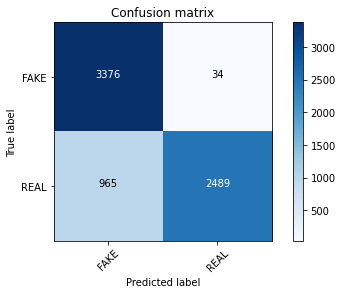

In [35]:
cm = metrics.confusion_matrix(y_test.values.astype('U'), predicted_nbt, labels=['0', '1'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
print(cm)

[[3376   34]
 [ 965 2489]]


In [37]:
nbc_pipeline=Pipeline([
    ('NBCV',count_vectorizer),
    ('nb_clf',MultinomialNB())
])
nbc_pipeline.fit(X_train.values.astype('U'),y_train.values.astype('U'))

Pipeline(memory=None,
         steps=[('NBCV',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [38]:
predicted_nbc=nbc_pipeline.predict(X_test.values.astype('U'))
score = metrics.accuracy_score(y_test.values.astype('U'), predicted_nbc)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.92%


Confusion matrix, without normalization


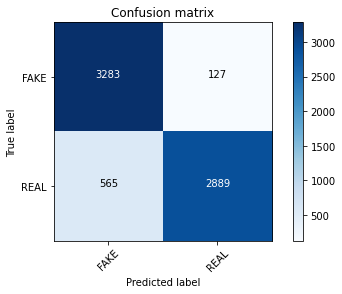

In [39]:
cm1 = metrics.confusion_matrix(y_test.values.astype('U'), predicted_nbc, labels=['0', '1'])
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [40]:
print(cm1)

[[3283  127]
 [ 565 2889]]


In [41]:
print(metrics.classification_report(y_test.values.astype('U'),predicted_nbt))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      3410
           1       0.99      0.72      0.83      3454

    accuracy                           0.85      6864
   macro avg       0.88      0.86      0.85      6864
weighted avg       0.88      0.85      0.85      6864



In [42]:
print(metrics.classification_report(y_test.values.astype('U'),predicted_nbc))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3410
           1       0.96      0.84      0.89      3454

    accuracy                           0.90      6864
   macro avg       0.91      0.90      0.90      6864
weighted avg       0.91      0.90      0.90      6864



In [43]:
# building Passive Aggressive Classifier 
# Applying Passive Aggressive Classifier
    
# Initialize a PassiveAggressiveClassifier\n",
linear_clf = Pipeline([
    ('linear',tfidf_vectorizer),
    ('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(X_train.values.astype('U'),y_train.values.astype('U'))

Pipeline(memory=None,
         steps=[('linear',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pa_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
       

In [44]:
#Predict on the test set and calculate accuracy\n",
pred = linear_clf.predict(X_test.values.astype('U'))
score = metrics.accuracy_score(y_test.values.astype('U'), pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.78%


Confusion matrix, without normalization


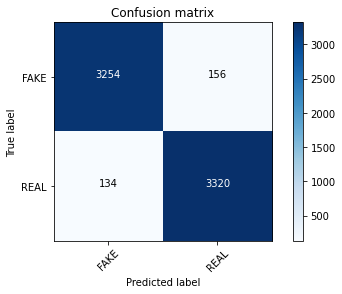

In [45]:
#Build confusion matrix

cm = metrics.confusion_matrix(y_test.values.astype('U'), pred, labels=['0', '1'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [46]:
print(cm)

[[3254  156]
 [ 134 3320]]


In [47]:
print(metrics.classification_report(y_test.values.astype('U'),pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3410
           1       0.96      0.96      0.96      3454

    accuracy                           0.96      6864
   macro avg       0.96      0.96      0.96      6864
weighted avg       0.96      0.96      0.96      6864



In [48]:
# saving best model to the disk

model_file = 'final_model.sav'
pickle.dump(linear_clf,open(model_file,'wb'))

In [86]:
import pickle
var = input("Please enter the news text you want to verify: ")
    
# function to run for prediction
def detecting_fake_news(var):
    #retrieving the best model for prediction call
    load_model = pickle.load(open('final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    if prediction[0]=='0':
        return (print("The given statement is FAKE"))
    elif prediction[0]=='1':
        return (print("The given statement is TRUE"))
        
                          
if __name__ == '__main__':
    detecting_fake_news(var)

Please enter the news text you want to verify: In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate c

In [84]:
message=df.iloc[5,3]

In [85]:
print(message)

In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the wor